In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [29]:
stats = pd.read_csv("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/stats.csv", index_col = 0)
type_chart = pd.read_csv("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/Pokemon_Type_Chart.csv", index_col = 0)
details = pd.read_csv("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/data.csv", index_col = 0)
results = pd.read_csv("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/result.csv", index_col = 0)
details = details.merge(stats)
details = details.merge(results)

In [30]:
#details["legendary"] = np.where(details["legendary"] == "Yes", 1, 0)
details["number"] = details["number"].str.replace("#0", "")
details[["type1", "type2"]] = details["type"].str.split(" / ", expand = True).fillna("Nil")
details["win_pct"] = details["win"] / 1025 * 100
details["lose_pct"] = details["lose"] / 1025 * 100
details["position"] = details["win"].rank(method="first", ascending=False).astype(int)

In [5]:
details.sort_values(by="position").tail()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position
439,440,Happiny,Normal,Natural Cure / Serene Grace,Friend Guard,100% female,40cycles,No Eggs Discovered,110.0,0.6,24.4,Fast,Pink,140.0,Playhouse Pokémon,4,0,100.0,5.0,5.0,15.0,65.0,30.0,220.0,18,1007,Normal,Nil,1.756098,98.243902,1021
823,824,Blipbug,Bug,Swarm / Compound Eyes,Telepathy,"50% male, 50% female",15cycles,Bug,36.0,0.4,8.0,Medium Fast,Blue,50.0,Larva Pokémon,8,0,25.0,20.0,20.0,25.0,45.0,45.0,180.0,18,1007,Bug,Nil,1.756098,98.243902,1022
190,191,Sunkern,Grass,Chlorophyll / Solar Power,Early Bird,"50% male, 50% female",20cycles,Grass,36.0,0.3,1.8,Medium Slow,Yellow,70.0,Seed Pokémon,2,0,30.0,30.0,30.0,30.0,30.0,30.0,180.0,15,1010,Grass,Nil,1.463415,98.536585,1023
745,746,Wishiwashi,Water,Schooling,NaN,"50% male, 50% female",15cycles,Water 2,61.0,0.2,0.3,Fast,Blue,70.0,Small Fry Pokémon,7,0,45.0,20.0,20.0,25.0,25.0,40.0,175.0,13,1012,Water,Nil,1.268293,98.731707,1024
348,349,Feebas,Water,Swift Swim / Oblivious,Adaptability,"50% male, 50% female",20cycles,Water 1 / Dragon,40.0,0.6,7.4,Erratic,Brown,70.0,Fish Pokémon,3,0,20.0,15.0,20.0,10.0,55.0,80.0,200.0,11,1014,Water,Nil,1.073171,98.926829,1025


In [6]:
details.describe()

,Base_Experience_Yield,height,weight,base_friendship,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,win_pct,lose_pct,position
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,151.089756,1.211317,66.977463,59.897561,4.741463,0.088780,70.072195,77.380488,72.395122,69.959024,70.088780,67.127805,427.023415,481.033171,543.966829,46.930065,53.069935,513.000000
std,79.022246,1.248299,121.277522,22.482942,2.633633,0.284565,26.665218,29.723557,29.364210,29.637133,26.668189,28.654567,112.779018,240.746079,240.746079,23.487422,23.487422,296.036315
min,36.000000,0.100000,0.100000,0.000000,1.000000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,11.000000,54.000000,1.073171,5.268293,1.000000
25%,66.000000,0.500000,8.500000,50.000000,3.000000,0.000000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,325.000000,266.000000,347.000000,25.951220,33.853659,257.000000
50%,158.000000,1.000000,28.000000,70.000000,5.000000,0.000000,67.000000,75.000000,70.000000,65.000000,65.000000,65.000000,450.000000,508.000000,517.000000,49.560976,50.439024,513.000000
75%,184.000000,1.500000,70.000000,70.000000,7.000000,0.000000,85.000000,100.000000,90.000000,90.000000,85.000000,88.000000,505.000000,678.000000,759.000000,66.146341,74.048780,769.000000
max,635.000000,20.000000,999.900000,140.000000,9.000000,1.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,971.000000,1014.000000,94.731707,98.926829,1025.000000


In [7]:
details["type1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [8]:
def get_type_wise_result(details):
    types = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
             'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
             'Dragon', 'Dark', 'Steel', 'Flying']

    result = []
    for i, type_ in enumerate(types):
        data = details[details["type"].str.contains(type_, case = False) == True]
        count = len(data)
        total = count * 1025
        wins = data["win"].sum()
        loses = data["lose"].sum()
        pct_wins = round(wins/total * 100, 2)
        pct_loses = round(loses/total * 100, 2)
        result.append({"type": type_, "number": count,"wins": wins, "loses": loses, 
                       "pct_wins": pct_wins, "pct_loses": pct_loses})
        
    return pd.DataFrame(result)

In [ ]:
# def get_type_combo_count(details):
#     types = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
#              'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
#              'Dragon', 'Dark', 'Steel', 'Flying']
#     for type_ in types:
#         count = (details["]

In [9]:
type_result = get_type_wise_result(details)
type_result = type_result.sort_values("pct_wins", ascending = False)
type_result.index = range(0, len(type_result))
type_result

,type,number,wins,loses,pct_wins,pct_loses
0,Dragon,70,45701,26049,63.69,36.31
1,Steel,65,41432,25193,62.19,37.81
2,Fighting,73,42811,32014,57.21,42.79
3,Dark,69,39591,31134,55.98,44.02
4,Ghost,65,36429,30196,54.68,45.32
5,Ice,48,26446,22754,53.75,46.25
6,Rock,74,39820,36030,52.50,47.50
7,Psychic,102,54472,50078,52.10,47.90
8,Electric,69,36759,33966,51.97,48.03
9,Ground,75,39792,37083,51.76,48.24


In [10]:
#details.nlargest(50, "win")

In [11]:
details["hp"].corr(details["win"])

np.float64(0.6565355642406496)

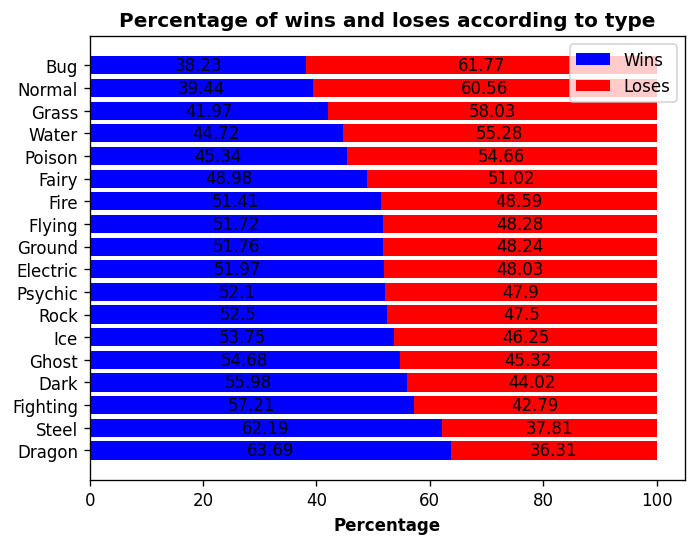

In [12]:
fig, ax = plt.subplots(dpi=120)
bars1 = ax.barh(type_result["type"], type_result["pct_wins"],
        color="b", label="Wins")
ax.bar_label(bars1, label_type="center", fontsize=10, color="black")
bars2 = ax.barh(type_result["type"], type_result["pct_loses"],
         left=type_result["pct_wins"], color="r", label="Loses")
ax.bar_label(bars2, label_type="center", fontsize=10, color="black")
plt.xlabel("Percentage", fontweight="bold")
plt.legend()
plt.title("Percentage of wins and loses according to type", fontweight = "bold")
plt.show()

In [13]:
top_100 = details.nlargest(100, "win")
type1 = top_100.groupby("type1")["name"].count()
type2 = top_100.groupby("type2")["name"].count()
#print(type1, type2)
print(type1 + type2)
# Flying 16, Bug 2, Nil 14

Bug          NaN
Dark        13.0
Dragon      27.0
Electric    10.0
Fairy       10.0
Fighting    12.0
Fire        10.0
Flying       NaN
Ghost       13.0
Grass        4.0
Ground      12.0
Ice          5.0
Nil          NaN
Normal       5.0
Poison       5.0
Psychic     15.0
Rock         4.0
Steel       15.0
Water        8.0
Name: name, dtype: float64


In [100]:
print((top_100["legendary"] == 1).sum())
print((details["legendary"] == "Yes").sum())
print((top_100["category"] == "Paradox Pokémon").sum())
print((top_100["ability"] == "Beast Boost").sum())

55
91
17
4


In [101]:
top_100.head()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position
1007,#1008,Miraidon,Electric / Dragon,Hadron Engine,NaN,Gender unknown,50cycles,No Eggs Discovered,335.0,3.5,240.0,Slow,Purple,0.0,Paradox Pokémon,9,1,100.0,85.0,100.0,135.0,115.0,135.0,670.0,971,54,Electric,Dragon,94.731707,5.268293,1
643,644,Zekrom,Dragon / Electric,Teravolt,NaN,Gender unknown,120cycles,No Eggs Discovered,306.0,2.9,345.0,Slow,Black,0.0,Deep Black Pokémon,5,1,100.0,150.0,120.0,120.0,100.0,90.0,680.0,965,60,Dragon,Electric,94.146341,5.853659,2
791,792,Lunala,Psychic / Ghost,Shadow Shield,NaN,Gender unknown,120cycles,No Eggs Discovered,306.0,4.0,120.0,Slow,Purple,0.0,Moone Pokémon,7,1,137.0,113.0,89.0,137.0,107.0,97.0,680.0,965,60,Psychic,Ghost,94.146341,5.853659,3
486,487,Giratina,Ghost / Dragon,Pressure,Telepathy,Gender unknown,120cycles,No Eggs Discovered,306.0,4.5,750.0,Slow,Black,0.0,Renegade Pokémon,4,1,150.0,100.0,120.0,100.0,120.0,90.0,680.0,962,63,Ghost,Dragon,93.853659,6.146341,4
889,890,Eternatus,Poison / Dragon,Pressure,NaN,Gender unknown,120cycles,No Eggs Discovered,345.0,20.0,950.0,Slow,Purple,0.0,Gigantic Pokémon,8,1,140.0,85.0,95.0,145.0,95.0,130.0,690.0,959,66,Poison,Dragon,93.560976,6.439024,5


In [14]:
details[(details["type"].str.contains("Steel / Dragon") == True) | 
    (details["type"].str.contains("Dragon / Steel") == True)]

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position
482,483,Dialga,Steel / Dragon,Pressure,Telepathy,Gender unknown,120cycles,No Eggs Discovered,306.0,5.4,683.0,Slow,White,0.0,Temporal Pokémon,4,1,100.0,120.0,120.0,150.0,100.0,90.0,680.0,947,78,Steel,Dragon,92.390244,7.609756,6
883,884,Duraludon,Steel / Dragon,Light Metal / Heavy Metal,Stalwart,"50% male, 50% female",30cycles,Mineral / Dragon,187.0,1.8,40.0,Medium Fast,White,50.0,Alloy Pokémon,8,0,70.0,95.0,115.0,120.0,50.0,85.0,535.0,763,262,Steel,Dragon,74.439024,25.560976,128
1017,#1018,Archaludon,Steel / Dragon,Stamina / Sturdy,Stalwart,"50% male, 50% female",30cycles,Mineral / Dragon,300.0,2.0,60.0,Medium Fast,White,50.0,Alloy Pokémon,9,0,90.0,105.0,130.0,125.0,65.0,85.0,600.0,850,175,Steel,Dragon,82.926829,17.073171,48


In [15]:
details[(details["type"].str.contains("Bug / Normal") == True) | 
    (details["type"].str.contains("Normal / Bug") == True)]

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position


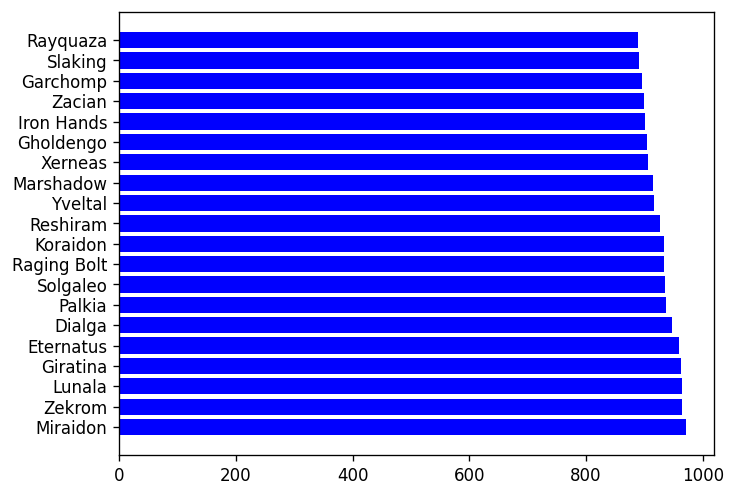

In [16]:
plt.figure(dpi = 120)
top_20_wins = details.nlargest(20, "win")
plt.barh(top_20_wins["name"], top_20_wins["win"], color = "b")
plt.show()

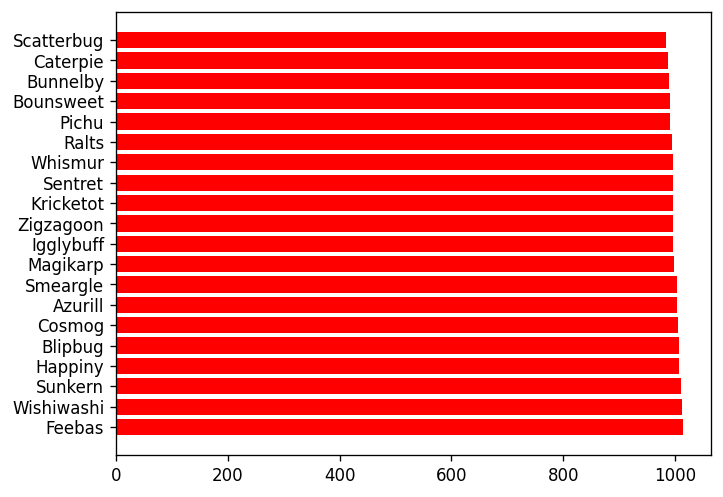

In [17]:
plt.figure(dpi = 120)
top_20_loses = details.nlargest(20, "lose")
plt.barh(top_20_loses["name"], top_20_loses["lose"], color = "r")
plt.show()

In [18]:
details[details["type"].str.contains("Fire") == True]["win"].sum()

np.int64(42685)

In [19]:
print(len(details[details["win"] < 512]))
print(len(details[details["win"] >= 512]))

519
506


In [98]:
needs = ['Base_Experience_Yield', 'height', 'weight',
        'base_friendship', 'gen',
        'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed', 'total', 'win', 'lose']

In [22]:
details[needs].corr()

,Base_Experience_Yield,height,weight,base_friendship,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose
Base_Experience_Yield,1.000000,0.476226,0.433907,-0.335197,0.170967,NaN,0.683652,0.620316,0.549325,0.643602,0.654099,0.513936,0.922539,0.878002,-0.878002
height,0.476226,1.000000,0.632504,-0.313313,0.052696,NaN,0.483217,0.384335,0.348725,0.319507,0.276189,0.201393,0.506783,0.488658,-0.488658
weight,0.433907,0.632504,1.000000,-0.383344,0.111277,NaN,0.476355,0.402339,0.447561,0.185233,0.265010,0.043313,0.457546,0.449167,-0.449167
base_friendship,-0.335197,-0.313313,-0.383344,1.000000,-0.407735,NaN,-0.174503,-0.307630,-0.228202,-0.243125,-0.163128,-0.230114,-0.342685,-0.328635,0.328635
gen,0.170967,0.052696,0.111277,-0.407735,1.000000,NaN,0.121887,0.146967,0.099932,0.086569,0.065650,0.079556,0.152059,0.189949,-0.189949
legendary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hp,0.683652,0.483217,0.476355,-0.174503,0.121887,NaN,1.000000,0.480018,0.299119,0.356717,0.365108,0.179567,0.666531,0.656536,-0.656536
attack,0.620316,0.384335,0.402339,-0.307630,0.146967,NaN,0.480018,1.000000,0.466646,0.286626,0.226016,0.353644,0.717170,0.725370,-0.725370
defense,0.549325,0.348725,0.447561,-0.228202,0.099932,NaN,0.299119,0.466646,1.000000,0.208710,0.501515,0.007538,0.629432,0.642333,-0.642333
special_attack,0.643602,0.319507,0.185233,-0.243125,0.086569,NaN,0.356717,0.286626,0.208710,1.000000,0.492095,0.423616,0.701008,0.652264,-0.652264


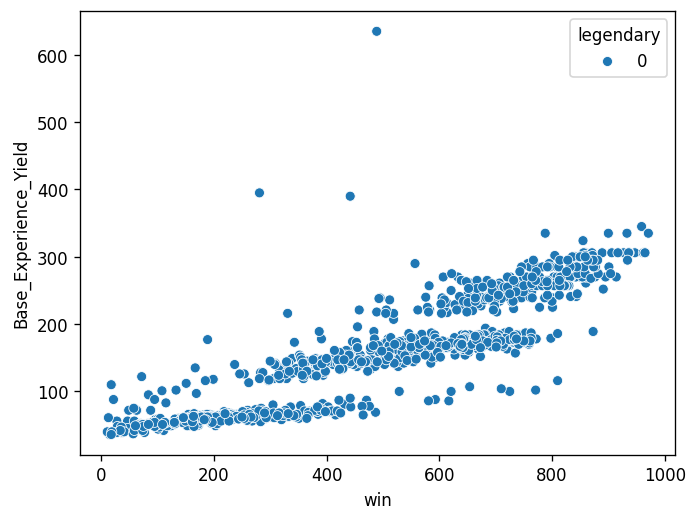

In [23]:
plt.figure(dpi = 120)
sns.scatterplot(y = details["Base_Experience_Yield"], x = details["win"],
               hue = details["legendary"])
plt.show()

0.9565084580408967


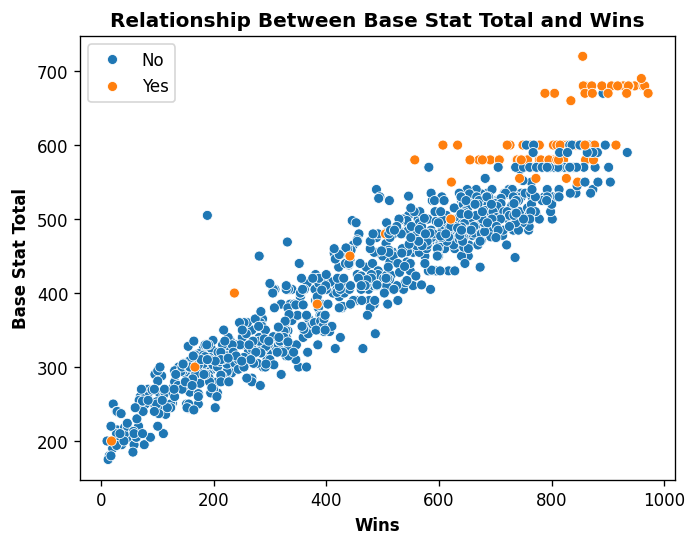

In [31]:
plt.figure(dpi = 120)
ax = sns.scatterplot(y = details["total"], x = details["win"],
               hue = details["legendary"])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["No", "Yes"])
plt.xlabel("Wins", fontweight = "bold")
plt.ylabel("Base Stat Total", fontweight = "bold")
plt.title("Relationship Between Base Stat Total and Wins", fontweight = "bold")
print(details["total"].corr(details["win"]))
plt.savefig("graphs/base_stats_win.png")
plt.show()

In [ ]:
plt.figure(dpi = 120)
ax = sns.scatterplot(y = details["total"], x = details["lose"],
               hue = details["legendary"])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["No", "Yes"])
plt.xlabel("Loses", fontweight = "bold")
plt.ylabel("Base Stat Total", fontweight = "bold")
plt.title("Relationship Between Base Stat Total and Loses", fontweight = "bold")
print(details["total"].corr(details["lose"]))
plt.show()

In [106]:
legendary = details[details["legendary"] == "Yes"].nlargest(91, "win")

In [107]:
ultra_beast = details[details["ability"].str.contains("Beast Boost") == True].nlargest(11, "win")
print(len(ultra_beast))

11


In [33]:
paradox = details[details["category"].str.contains("Paradox Pokémon") == True].nlargest(22, "win")
print(len(paradox))

22


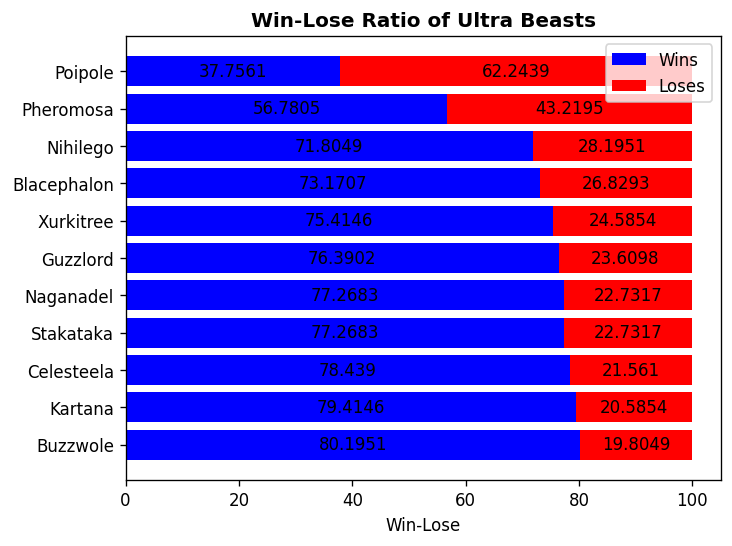

In [109]:
fig, ax = plt.subplots(dpi = 120)
bars1 = ax.barh(ultra_beast["name"], ultra_beast["win_pct"], color="b",
        label="Wins")
ax.bar_label(bars1, label_type="center", fontsize=10, color="black")
bars2 = ax.barh(ultra_beast["name"], ultra_beast["lose_pct"], color="r", left = ultra_beast["win_pct"],
        label="Loses")
ax.bar_label(bars2, label_type="center", fontsize=10, color="black")
plt.title("Win-Lose Ratio of Ultra Beasts", fontweight = "bold")
plt.xlabel("Win-Lose")
plt.legend()
plt.show()

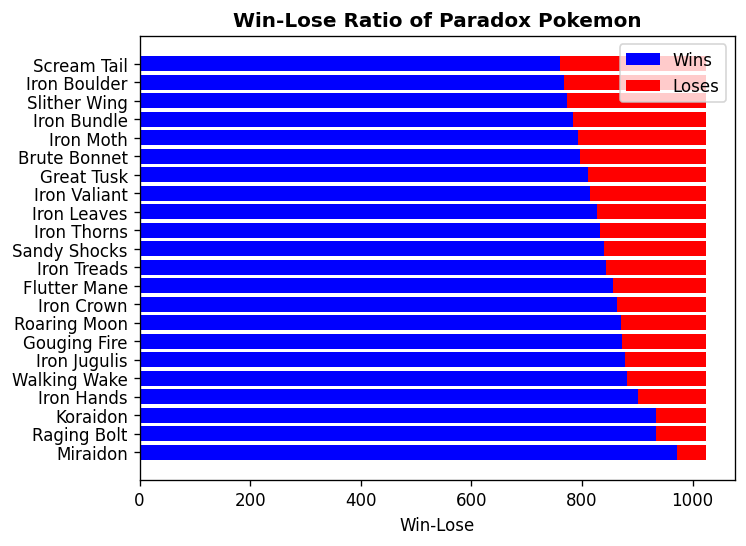

In [35]:
plt.figure(dpi = 120)
plt.barh(paradox["name"], paradox["win"], color="b",
        label="Wins")
plt.barh(paradox["name"], paradox["lose"], color="r", left = paradox["win"],
        label="Loses")
plt.title("Win-Lose Ratio of Paradox Pokemon", fontweight = "bold")
plt.xlabel("Win-Lose")
plt.legend()
plt.show()

In [36]:
starters = ["Bulbasaur","Charmander","Squirtle","Chikorita",
            "Cyndaquil","Totodile","Treecko","Torchic","Mudkip",
            "Turtwig","Chimchar","Piplup","Snivy","Tepig","Oshawott",
            "Chespin","Fennekin", "Froakie","Rowlet","Litten",
            "Popplio", "Grookey","Scorbunny","Sobble",
            "Sprigatito","Fuecoco", "Quaxly"]

In [46]:
def get_starter_data(starters, details):
    for i, name in enumerate(starters):
        if ((details["name"].str.contains(name)).sum() == 1) & (i < 1):
            num = int(details[details["name"] == name]["number"].iloc[0]) - 1
            data = details.loc[[num, num+1, num+2], :]
            starter_data = data
        elif ((details["name"].str.contains(name)).sum() == 1) & (i >= 1):
            num = int(details[details["name"] == name]["number"].iloc[0]) - 1
            data = details.loc[[num, num+1, num+2], :]
            starter_data = pd.concat([starter_data, data])
    return starter_data

In [47]:
starter_data = get_starter_data(starters, details)

In [66]:
starter_data.index = range(0, len(starter_data))
starter_data["win_pct"] = round(starter_data["win"]/1025 * 100, 2)
starter_data["stage"] = (starter_data.index % 3) + 1
starter_data["pos_within"] = starter_data["win"].rank(method="first", ascending=False).astype(int)
# starter_data.loc[np.array(starter_data.index)[np.arange(0,81,3)], "stage"] = 1
# starter_data.loc[np.array(starter_data.index)[np.arange(1,81,3)], "stage"] = 2
# starter_data.loc[np.array(starter_data.index)[np.arange(2,81,3)], "stage"] = 3
#(starter_final.nlargest(27, "win")[["name", "win"]])

In [67]:
stage_3 = starter_data[starter_data["stage"] == 3]
stage_2 = starter_data[starter_data["stage"] == 2]
stage_1 = starter_data[starter_data["stage"] == 1]

In [84]:
stage_3.sort_values("position", ascending = True).head()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position,stage,pos_within
77,911,Skeledirge,Fire / Ghost,Blaze,Unaware,"87.5% male, 12.5% female",20cycles,Field,265.0,1.6,326.5,Medium Slow,Red,50.0,Singer Pokémon,9,No,104.0,75.0,100.0,110.0,75.0,66.0,530.0,813,212,Fire,Ghost,79.32,20.682927,79,3,1
62,730,Primarina,Water / Fairy,Torrent,Liquid Voice,"87.5% male, 12.5% female",15cycles,Water 1 / Field,239.0,1.8,44.0,Medium Slow,Blue,70.0,Soloist Pokémon,7,No,80.0,74.0,74.0,126.0,116.0,60.0,530.0,787,238,Water,Fairy,76.78,23.219512,106,3,2
59,727,Incineroar,Fire / Dark,Blaze,Intimidate,"87.5% male, 12.5% female",15cycles,Field,239.0,1.8,83.0,Medium Slow,Red,70.0,Heel Pokémon,7,No,95.0,115.0,90.0,80.0,90.0,60.0,530.0,765,260,Fire,Dark,74.63,25.365854,124,3,3
50,655,Delphox,Fire / Psychic,Blaze,Magician,"87.5% male, 12.5% female",20cycles,Field,240.0,1.5,39.0,Medium Slow,Red,70.0,Fox Pokémon,6,No,75.0,69.0,72.0,114.0,100.0,104.0,534.0,761,264,Fire,Psychic,74.24,25.756098,132,3,4
26,260,Swampert,Water / Ground,Torrent,Damp,"87.5% male, 12.5% female",20cycles,Monster / Water 1,241.0,1.5,81.9,Medium Slow,Blue,70.0,Mud Fish Pokémon,3,No,100.0,110.0,90.0,85.0,90.0,60.0,535.0,746,279,Water,Ground,72.78,27.219512,149,3,5


In [69]:
stage_2.sort_values("position", ascending=False).head()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position,stage,pos_within
37,496,Servine,Grass,Overgrow,Contrary,"87.5% male, 12.5% female",20cycles,Field / Grass,145.0,0.8,16.0,Medium Slow,Green,70.0,Grass Snake Pokémon,5,No,60.0,60.0,75.0,60.0,75.0,83.0,413.0,300,725,Grass,Nil,29.27,70.731707,728,2,55
19,253,Grovyle,Grass,Overgrow,Unburden,"87.5% male, 12.5% female",20cycles,Monster / Dragon,142.0,0.9,21.6,Medium Slow,Green,70.0,Wood Gecko Pokémon,3,No,50.0,65.0,45.0,85.0,65.0,95.0,405.0,306,719,Grass,Nil,29.85,70.146341,724,2,54
10,153,Bayleef,Grass,Overgrow,Leaf Guard,"87.5% male, 12.5% female",20cycles,Monster / Grass,142.0,1.2,15.8,Medium Slow,Green,70.0,Leaf Pokémon,2,No,60.0,62.0,80.0,63.0,80.0,60.0,405.0,309,716,Grass,Nil,30.15,69.853659,721,2,53
73,907,Floragato,Grass,Overgrow,Protean,"87.5% male, 12.5% female",20cycles,Field / Grass,144.0,0.9,12.2,Medium Slow,Green,50.0,Grass Cat Pokémon,9,No,61.0,80.0,63.0,60.0,63.0,83.0,410.0,329,696,Grass,Nil,32.10,67.902439,702,2,51
7,008,Wartortle,Water,Torrent,Rain Dish,"87.5% male, 12.5% female",20cycles,Monster / Water 1,142.0,1.0,22.5,Medium Slow,Blue,70.0,Turtle Pokémon,1,No,59.0,63.0,80.0,65.0,80.0,58.0,405.0,334,691,Water,Nil,32.59,67.414634,690,2,50


In [88]:
stage_1.sort_values("position", ascending=False).head()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position,stage,pos_within
36,495,Snivy,Grass,Overgrow,Contrary,"87.5% male, 12.5% female",20cycles,Field / Grass,62.0,0.6,8.1,Medium Slow,Green,70.0,Grass Snake Pokémon,5,No,45.0,45.0,55.0,45.0,55.0,63.0,308.0,157,868,Grass,Nil,15.32,84.682927,918,1,81
6,007,Squirtle,Water,Torrent,Rain Dish,"87.5% male, 12.5% female",20cycles,Monster / Water 1,63.0,0.5,9.0,Medium Slow,Blue,70.0,Tiny Turtle Pokémon,1,No,44.0,48.0,65.0,50.0,64.0,43.0,314.0,173,852,Water,Nil,16.88,83.121951,891,1,80
9,152,Chikorita,Grass,Overgrow,Leaf Guard,"87.5% male, 12.5% female",20cycles,Monster / Grass,64.0,0.9,6.4,Medium Slow,Green,70.0,Leaf Pokémon,2,No,45.0,49.0,65.0,49.0,65.0,45.0,318.0,174,851,Grass,Nil,16.98,83.024390,890,1,79
18,252,Treecko,Grass,Overgrow,Unburden,"87.5% male, 12.5% female",20cycles,Monster / Dragon,62.0,0.5,5.0,Medium Slow,Green,70.0,Wood Gecko Pokémon,3,No,40.0,45.0,35.0,65.0,55.0,70.0,310.0,175,850,Grass,Nil,17.07,82.926829,889,1,78
72,906,Sprigatito,Grass,Overgrow,Protean,"87.5% male, 12.5% female",20cycles,Field / Grass,62.0,0.4,4.1,Medium Slow,Green,50.0,Grass Cat Pokémon,9,No,40.0,61.0,54.0,45.0,45.0,65.0,310.0,178,847,Grass,Nil,17.37,82.634146,887,1,77


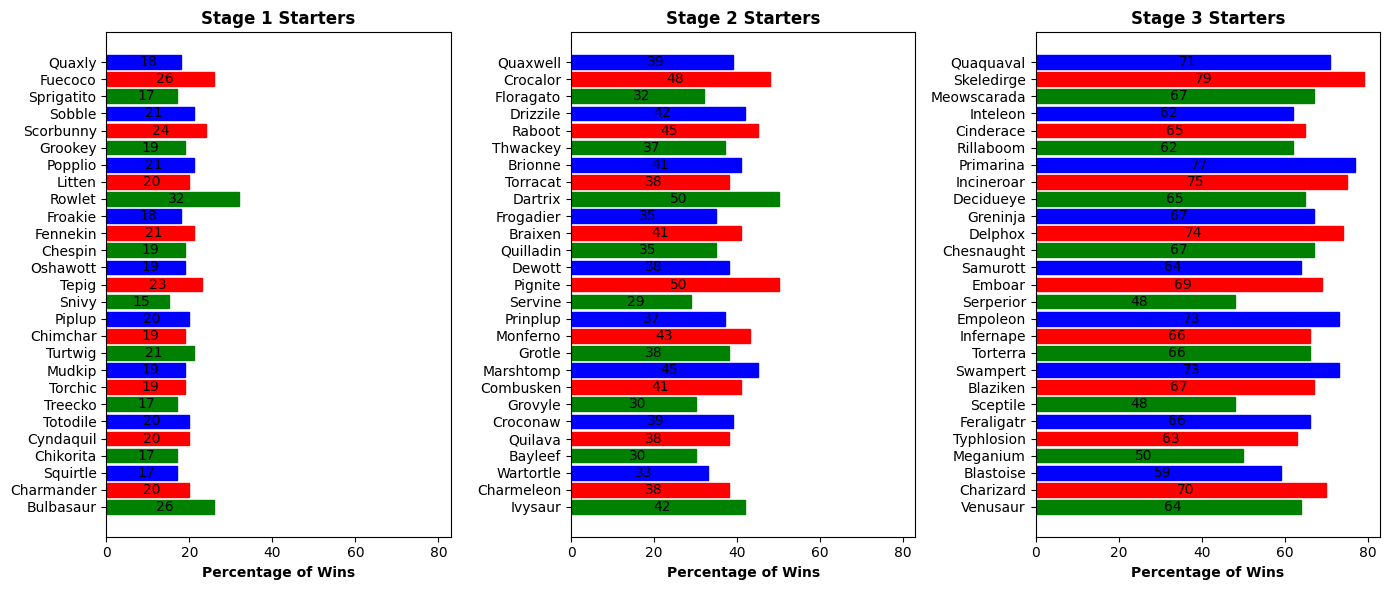

In [41]:
bar_colors = ["green", "red", "blue"]
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True,
                                   figsize = (14,6))

for stage, ax in enumerate(axes, start=1):
    x = starter_data[starter_data["stage"] == stage]["name"]
    y = starter_data[starter_data["stage"] == stage]["win_pct"]
    #z = starter_data[starter_data["stage"] == stage]["lose"]
    bars = ax.barh(x, y, color = "blue")
    for i, bar in enumerate(bars):
        bar.set_color(bar_colors[i % 3])
    #ax1.barh(x, z, left = y, color = "red")
    ax.bar_label(bars, color="black", label_type="center", padding=3, fontsize=10)
    ax.set_xlabel("Percentage of Wins", fontweight = "bold")
    ax.set_title(f"Stage {stage} Starters", fontweight = "bold")

plt.tight_layout()
fig.savefig("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/graphs/starters_win.png")
plt.show()


In [102]:
types = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
             'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
             'Dragon', 'Dark', 'Steel', 'Flying']